In [ ]:
import os


In [ ]:
!huggingface-cli login

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from  sklearn import svm


data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LoanDataset - LoansDatasest.csv")
data.head()


,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


#Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [ ]:
data.describe()

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32583.000000,32586.000000,31691.000000,29470.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.919628,6.360528,4.142746,3.240440,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8144.500000,23.000000,2.000000,7.900000,3.000000,3.000000
50%,16288.000000,26.000000,4.000000,10.990000,4.000000,4.000000
75%,24433.500000,30.000000,7.000000,13.470000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


In [ ]:
print(data)

       customer_id  customer_age customer_income home_ownership  \
0              1.0            22           59000           RENT   
1              2.0            21            9600            OWN   
2              3.0            25            9600       MORTGAGE   
3              4.0            23           65500           RENT   
4              5.0            24           54400           RENT   
...            ...           ...             ...            ...   
32581      32577.0            57           53000       MORTGAGE   
32582      32578.0            54          120000       MORTGAGE   
32583      32579.0            65           76000           RENT   
32584      32580.0            56          150000       MORTGAGE   
32585      32581.0            99           42000           RENT   

       employment_duration      loan_intent loan_grade   loan_amnt  \
0                    123.0         PERSONAL          C  £35,000.00   
1                      5.0        EDUCATION          A 

In [ ]:
print(data.duplicated().sum())

6


In [ ]:
data=data.drop_duplicates()
print(data.duplicated().sum())

0


In [ ]:
print(data.isnull().sum())

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20736
cred_hist_length           0
Current_loan_status        4
dtype: int64


In [ ]:
#data.drop('customer_id', axis=1, inplace=True)

##Cleaning data

In [ ]:

data['historical_default']=data['historical_default'].fillna(data['historical_default'].mode()[0])
data['Current_loan_status']=data['Current_loan_status'].fillna(data['Current_loan_status'].mode()[0])

In [ ]:

data['loan_int_rate'] = pd.to_numeric(data['loan_int_rate'], errors='coerce')
data['loan_int_rate']=data['loan_int_rate'].fillna(data['loan_int_rate'].mean())


data['employment_duration'] = pd.to_numeric(data['employment_duration'], errors='coerce')
data['employment_duration']=data['employment_duration'].fillna(data['employment_duration'].mean())



In [ ]:
data = data.dropna(subset=['loan_amnt'])

In [ ]:
print(data.isna().sum())

customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64


In [ ]:
data.Current_loan_status.value_counts()

,count
Current_loan_status,
NO DEFAULT,25744
DEFAULT,6835


In [ ]:
data.shape

(32579, 12)

In [ ]:
print(data.columns)

Index(['customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')


In [ ]:
print(data['historical_default'].value_counts())

historical_default
Y    26862
N     5717
Name: count, dtype: int64


In [ ]:
print(data['home_ownership'].value_counts())

home_ownership
RENT        16444
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64


In [ ]:
print(data['loan_grade'].value_counts())

loan_grade
A    15656
B     9063
C     4926
D     2629
E      305
Name: count, dtype: int64


In [ ]:
print(data['loan_intent'].value_counts())

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5718
PERSONAL             5521
DEBTCONSOLIDATION    5211
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


In [ ]:

data['loan_intent'] = data['loan_intent'].replace({'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE':3, 'PERSONAL':4, 'DEBTCONSOLIDATION':5, 'HOMEIMPROVEMENT':6})
data['loan_intent'] = pd.to_numeric(data['loan_intent'], errors='coerce')
data['loan_grade'] = data['loan_grade'].replace({'A': 1, 'B': 2, 'C': 3, 'D':4, 'E':5})
data['historical_default'] = data['historical_default'].replace({'Y': 1, 'N': 0})
data['home_ownership'] = data['home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2,'OTHER':3})



<ipython-input-31-699183f119d7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['loan_intent'] = data['loan_intent'].replace({'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE':3, 'PERSONAL':4, 'DEBTCONSOLIDATION':5, 'HOMEIMPROVEMENT':6})
<ipython-input-31-699183f119d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_intent'] = data['loan_intent'].replace({'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE':3, 'PERSONAL':4, 'DEBTCONSOLIDATION':5, 'HOMEIMPROVEMENT':6})
<ipython-input-31-699183f119d7>:3: SettingWithCopyWarnin

In [ ]:
print(data)

       customer_age customer_income  home_ownership  employment_duration  \
0                22           59000               0                123.0   
1                21            9600               2                  5.0   
2                25            9600               1                  1.0   
3                23           65500               0                  4.0   
4                24           54400               0                  8.0   
...             ...             ...             ...                  ...   
32581            57           53000               1                  1.0   
32582            54          120000               1                  4.0   
32583            65           76000               0                  3.0   
32584            56          150000               1                  5.0   
32585            99           42000               0                  2.0   

       loan_intent  loan_grade   loan_amnt  loan_int_rate  term_years  \
0             

In [ ]:
print(data['loan_amnt'].apply(type).unique())

[<class 'str'>]


In [ ]:
def clean_loan_amount(value):

    if isinstance(value, float) or isinstance(value, int):
        return str(value)
    elif isinstance(value, str):
        value = value.replace('£', '')
        value = value.replace(',', '')
        return value
    return value


data['loan_amnt'] = data['loan_amnt'].apply(clean_loan_amount)


data['loan_amnt'] = pd.to_numeric(data['loan_amnt'], errors='coerce')


print(data['loan_amnt'].head())

0    35000.0
1     1000.0
2     5500.0
3    35000.0
4    35000.0
Name: loan_amnt, dtype: float64


<ipython-input-34-712da9267801>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_amnt'] = data['loan_amnt'].apply(clean_loan_amount)
<ipython-input-34-712da9267801>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_amnt'] = pd.to_numeric(data['loan_amnt'], errors='coerce')


In [ ]:
data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,0,123.0,4,3,35000.0,16.02,10,1,3,DEFAULT
1,21,9600,2,5.0,1,1,1000.0,11.14,1,1,2,NO DEFAULT
2,25,9600,1,1.0,2,2,5500.0,12.87,5,0,3,DEFAULT
3,23,65500,0,4.0,2,2,35000.0,15.23,10,0,2,DEFAULT
4,24,54400,0,8.0,2,2,35000.0,14.27,10,1,4,DEFAULT


In [ ]:
print(data.dtypes)

customer_age             int64
customer_income         object
home_ownership           int64
employment_duration    float64
loan_intent              int64
loan_grade               int64
loan_amnt              float64
loan_int_rate          float64
term_years               int64
historical_default       int64
cred_hist_length         int64
Current_loan_status     object
dtype: object


In [ ]:
data['customer_income'] = pd.to_numeric(data['customer_income'], errors='coerce')

<ipython-input-37-5bee07bc2933>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_income'] = pd.to_numeric(data['customer_income'], errors='coerce')


#Data Visualizatoin

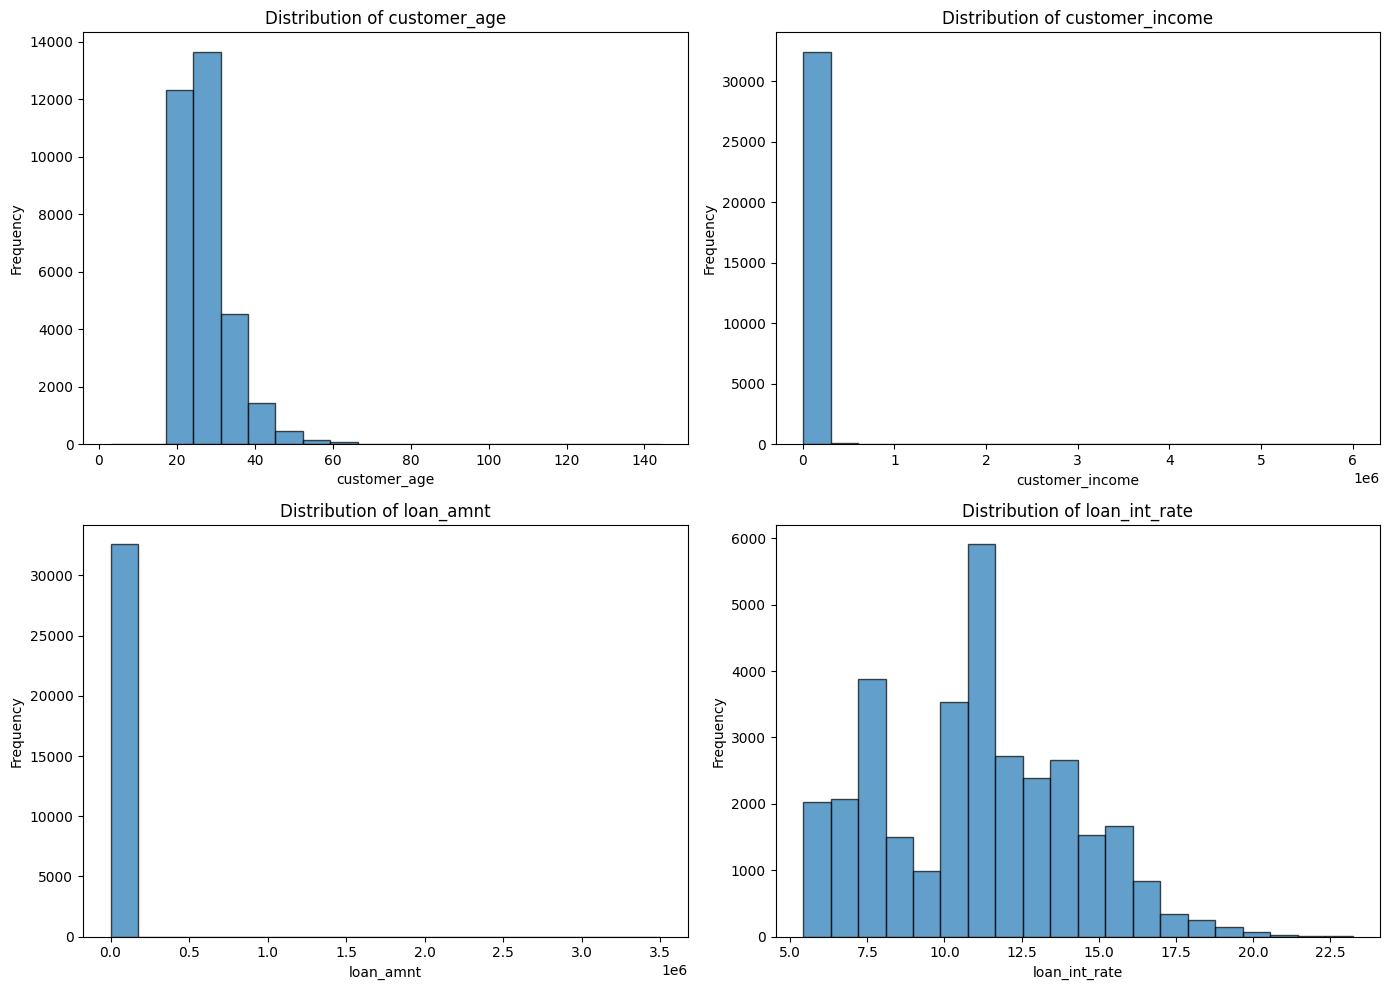

In [ ]:
numeric_columns = ['customer_age', 'customer_income', 'loan_amnt', 'loan_int_rate']

plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(data[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

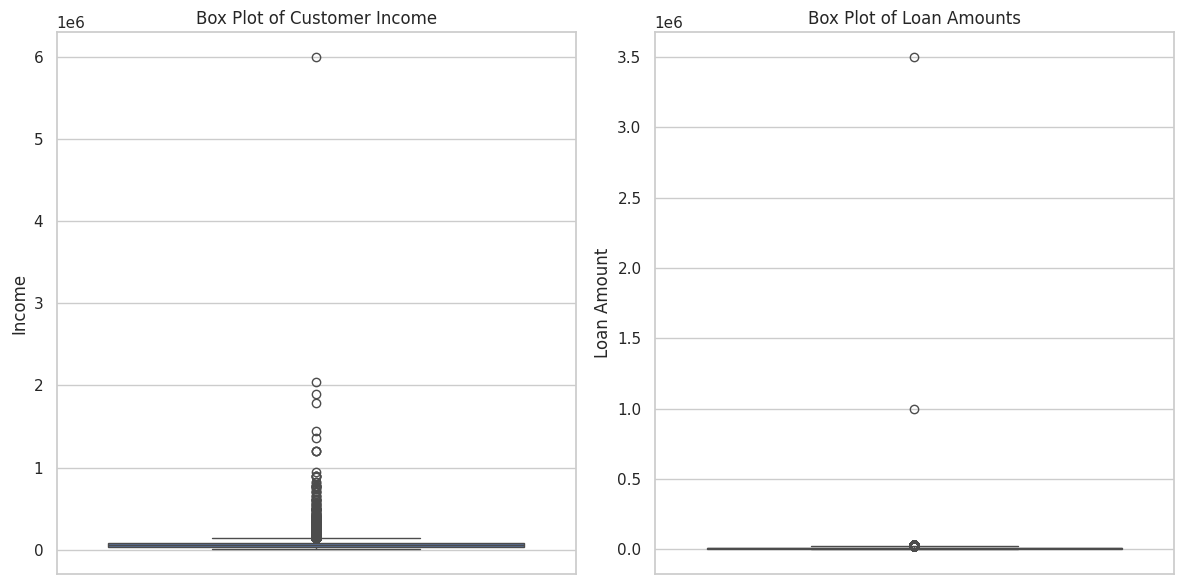

In [ ]:
sns.set(style="whitegrid")

# Boxplots for Customer Income
plt.figure(figsize=(12, 6))

#  Boxplot for Customer Income
plt.subplot(1, 2, 1)
sns.boxplot(y=data['customer_income'])
plt.title('Box Plot of Customer Income')
plt.ylabel('Income')

#  Boxplot for Loan Amount
plt.subplot(1, 2, 2)
sns.boxplot(y=data['loan_amnt'])
plt.title('Box Plot of Loan Amounts')
plt.ylabel('Loan Amount')


plt.tight_layout()
plt.show()

In [ ]:
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]


income_outliers = identify_outliers(data['customer_income'])
loan_outliers = identify_outliers(data['loan_amnt'])

print("Income Outliers:\n", income_outliers)
print("Loan Amount Outliers:\n", loan_outliers)


data['customer_income'] = np.where(data['customer_income'] < income_outliers.min(), income_outliers.min(), data['customer_income'])
data['customer_income'] = np.where(data['customer_income'] > income_outliers.max(), income_outliers.max(), data['customer_income'])

data['loan_amnt'] = np.where(data['loan_amnt'] < loan_outliers.min(), loan_outliers.min(), data['loan_amnt'])
data['loan_amnt'] = np.where(data['loan_amnt'] > loan_outliers.max(), loan_outliers.max(), data['loan_amnt'])


print("Data After Handling Outliers:")
print(data)

Income Outliers:
 15        500000.0
20        162500.0
33        306000.0
34        300000.0
42        300000.0
           ...    
32549     780000.0
32551    1900000.0
32556     780000.0
32567     160000.0
32584     150000.0
Name: customer_income, Length: 1482, dtype: float64
Loan Amount Outliers:
 0        35000.0
3        35000.0
4        35000.0
6        35000.0
7        35000.0
          ...   
32529    30000.0
32544    24000.0
32546    25000.0
32567    24000.0
32583    35000.0
Name: loan_amnt, Length: 1688, dtype: float64
Data After Handling Outliers:
       customer_age  customer_income  home_ownership  employment_duration  \
0                22         140300.0               0                123.0   
1                21         140300.0               2                  5.0   
2                25         140300.0               1                  1.0   
3                23         140300.0               0                  4.0   
4                24         140300.0              

<ipython-input-40-75eaf10c7c4d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_income'] = np.where(data['customer_income'] < income_outliers.min(), income_outliers.min(), data['customer_income'])
<ipython-input-40-75eaf10c7c4d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_income'] = np.where(data['customer_income'] > income_outliers.max(), income_outliers.max(), data['customer_income'])
<ipython-input-40-75eaf10c7c4d>:20: SettingWithCopyWarning: 
A value is trying to be

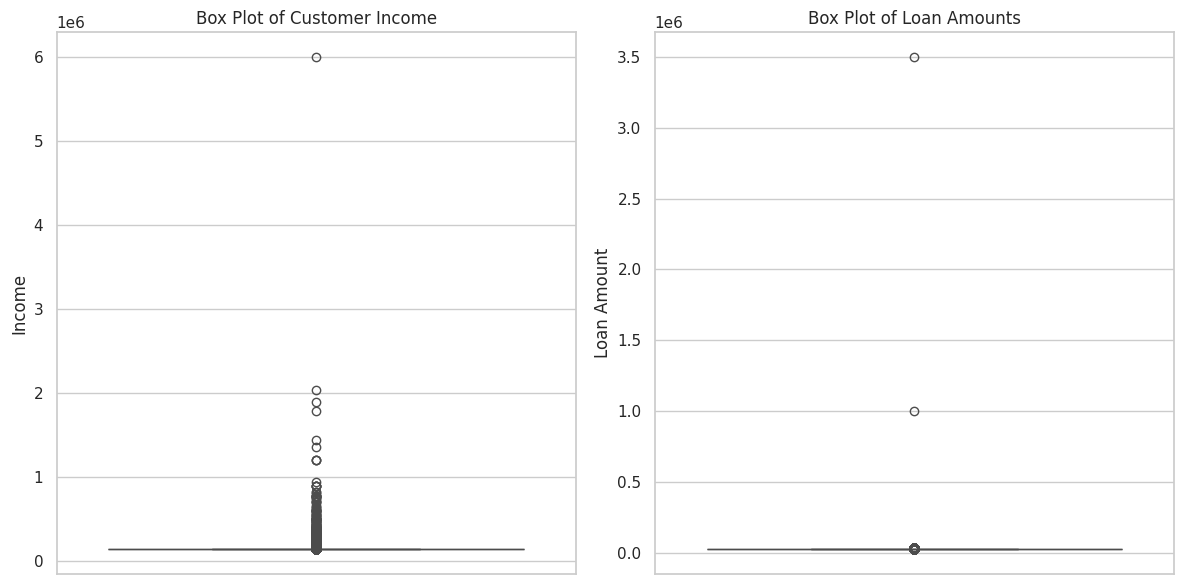

In [ ]:
sns.set(style="whitegrid")

#  Boxplots for Customer Income
plt.figure(figsize=(12, 6))

#  Boxplot for Customer Income
plt.subplot(1, 2, 1)
sns.boxplot(y=data['customer_income'])
plt.title('Box Plot of Customer Income')
plt.ylabel('Income')

# Boxplot for Loan Amount
plt.subplot(1, 2, 2)
sns.boxplot(y=data['loan_amnt'])
plt.title('Box Plot of Loan Amounts')
plt.ylabel('Loan Amount')


plt.tight_layout()
plt.show()

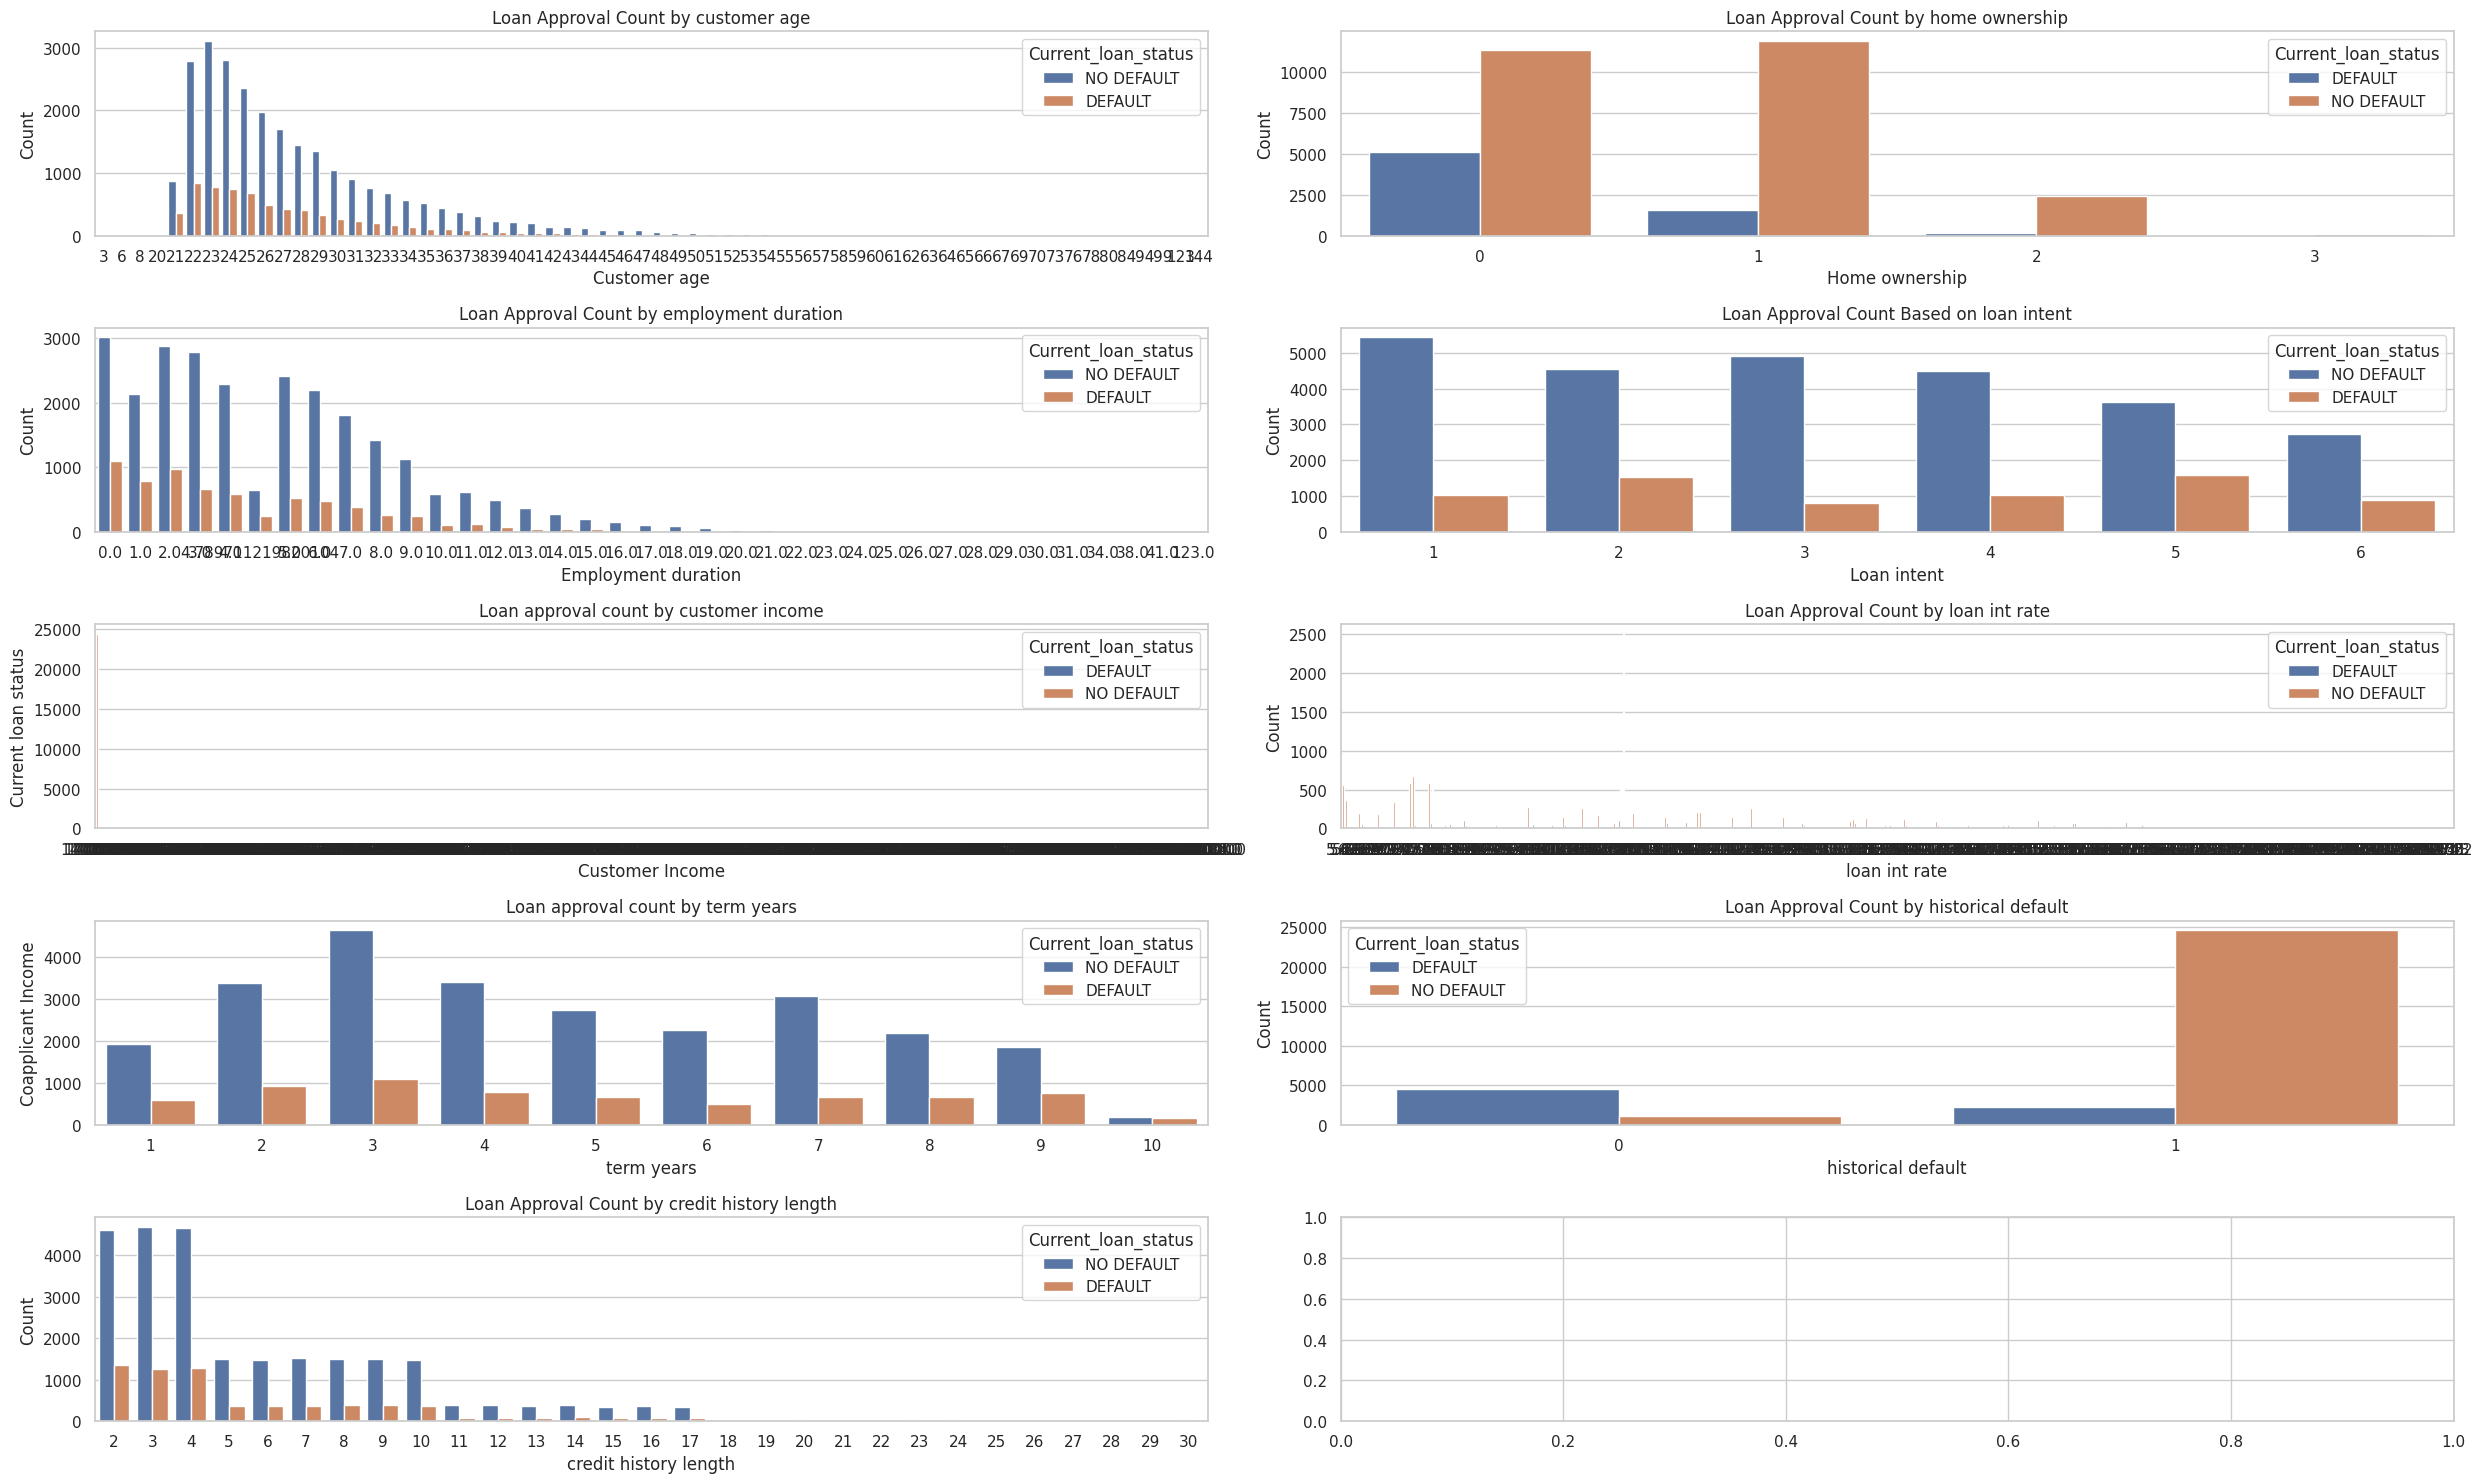

In [ ]:


sns.set(style="whitegrid")


fig, axs = plt.subplots(5, 2, figsize=(25, 15))


sns.countplot(data=data, x='customer_age', hue='Current_loan_status', ax=axs[0, 0])
axs[0, 0].set_title('Loan Approval Count by customer age')
axs[0, 0].set_xlabel('Customer age')
axs[0, 0].set_ylabel('Count')


sns.countplot(data=data, x='home_ownership', hue='Current_loan_status', ax=axs[0, 1])
axs[0, 1].set_title('Loan Approval Count by home ownership')
axs[0, 1].set_xlabel('Home ownership')
axs[0, 1].set_ylabel('Count')


sns.countplot(data=data, x='employment_duration', hue='Current_loan_status', ax=axs[1, 0])
axs[1, 0].set_title('Loan Approval Count by employment duration')
axs[1, 0].set_xlabel('Employment duration')
axs[1, 0].set_ylabel('Count')

sns.countplot(data=data, x='loan_intent', hue='Current_loan_status', ax=axs[1, 1])
axs[1, 1].set_title('Loan Approval Count Based on loan intent')
axs[1, 1].set_xlabel('Loan intent')
axs[1, 1].set_ylabel('Count')

sns.countplot(data=data, x='customer_income', hue='Current_loan_status', ax=axs[2, 0])
axs[2, 0].set_title('Loan approval count by customer income')
axs[2, 0].set_xlabel('Customer Income')
axs[2, 0].set_ylabel('Current loan status')


sns.countplot(data=data, x='loan_int_rate', hue='Current_loan_status', ax=axs[2, 1])
axs[2, 1].set_title('Loan Approval Count by loan int rate')
axs[2, 1].set_xlabel('loan int rate')
axs[2, 1].set_ylabel('Count')


sns.countplot(data=data, x='term_years', hue='Current_loan_status', ax=axs[3, 0])
axs[3, 0].set_title('Loan approval count by term years')
axs[3, 0].set_xlabel('term years')
axs[3, 0].set_ylabel('Coapplicant Income')

sns.countplot(data=data, x='historical_default', hue='Current_loan_status', ax=axs[3, 1])
axs[3, 1].set_title('Loan Approval Count by historical default')
axs[3, 1].set_xlabel('historical default')
axs[3, 1].set_ylabel('Count')

sns.countplot(data=data, x='cred_hist_length', hue='Current_loan_status', ax=axs[4, 0])
axs[4, 0].set_title('Loan Approval Count by credit history length')
axs[4, 0].set_xlabel('credit history length')
axs[4, 0].set_ylabel('Count')

plt.tight_layout()
plt.show()

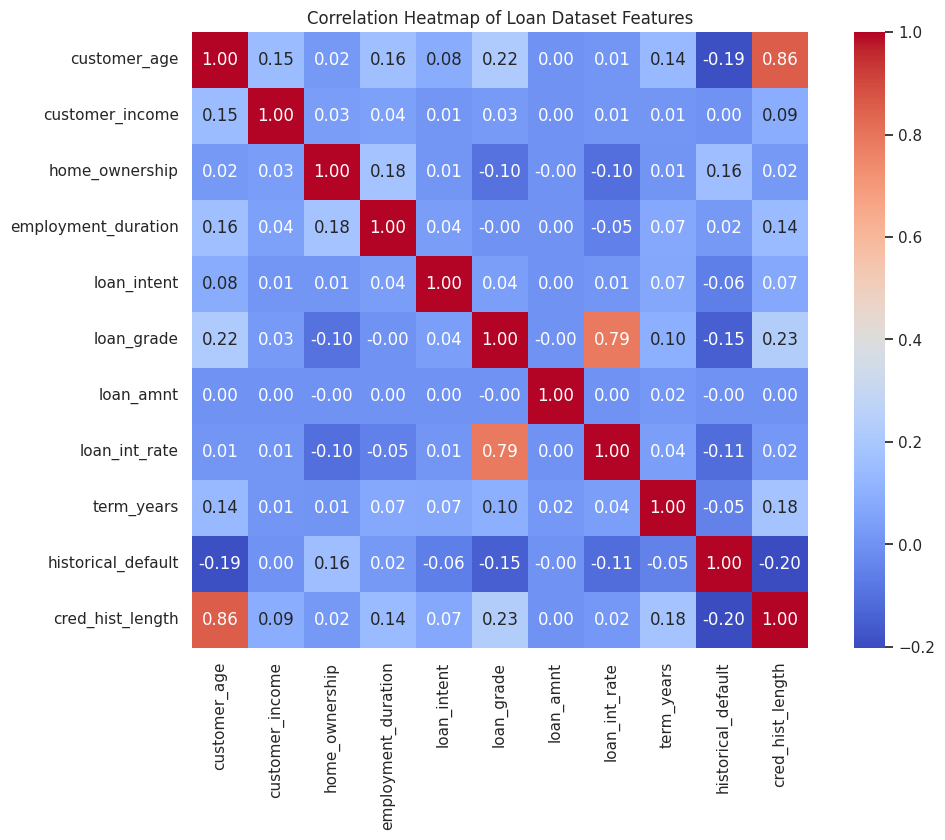

In [ ]:
plt.figure(figsize=(12, 8))

numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Loan Dataset Features')
plt.show()

#Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['term_years','loan_amnt','employment_duration','customer_income','customer_age']] = scaler.fit_transform(data[[ 'term_years','loan_amnt','employment_duration','customer_income','customer_age']])

In [ ]:

data['Current_loan_status'] = data['Current_loan_status'].map({'DEFAULT': 1, 'NO DEFAULT': 0})

#Training the model

In [ ]:

from sklearn.model_selection import train_test_split

X = data.drop('Current_loan_status', axis=1)
y = data['Current_loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(X_train)

(26063, 11) (6516, 11)
       customer_age  customer_income  home_ownership  employment_duration  \
24389      0.042075        -0.076767               2             0.296266   
28397     -0.115176        -0.076767               1            -0.193285   
1341      -1.058681        -0.076767               1             0.051490   
7050      -0.429678        -0.076767               0            -0.438061   
8228      -0.901431        -0.076767               2             0.051490   
...             ...              ...             ...                  ...   
29807      1.300082        -0.076767               0             3.723124   
5393      -0.901431        -0.076767               0             0.000017   
863       -0.901431         0.337571               0             0.296266   
15800     -0.429678        -0.076767               2             1.030592   
23659      0.042075        -0.076767               0             1.520144   

       loan_intent  loan_grade  loan_amnt  loan_int_

In [ ]:
print(y_train.shape, y_test.shape)
print(y_train.dtypes)
print(y_train)

(26063,) (6516,)
int64
24389    0
28397    0
1341     1
7050     0
8228     0
        ..
29807    1
5393     1
863      0
15800    0
23659    0
Name: Current_loan_status, Length: 26063, dtype: int64


In [ ]:
print(y_train.isnull().sum())

0


In [ ]:

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')


X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

##Train the Random Forest Model

In [ ]:

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
predictions = (model.predict(X_test))



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[5088   80]
 [ 219 1129]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5168
           1       0.93      0.84      0.88      1348

    accuracy                           0.95      6516
   macro avg       0.95      0.91      0.93      6516
weighted avg       0.95      0.95      0.95      6516



In [ ]:
predictions_df = pd.DataFrame(predictions, columns=['Predicted'])
actual_df = pd.DataFrame(y_test.values, columns=['Actual'])

results = pd.concat([predictions_df, actual_df], axis=1)

correlation = results.corr().loc['Predicted', 'Actual']
print(f'Correlation between predicted and actual values: {correlation}')

Correlation between predicted and actual values: 0.8565851679517996


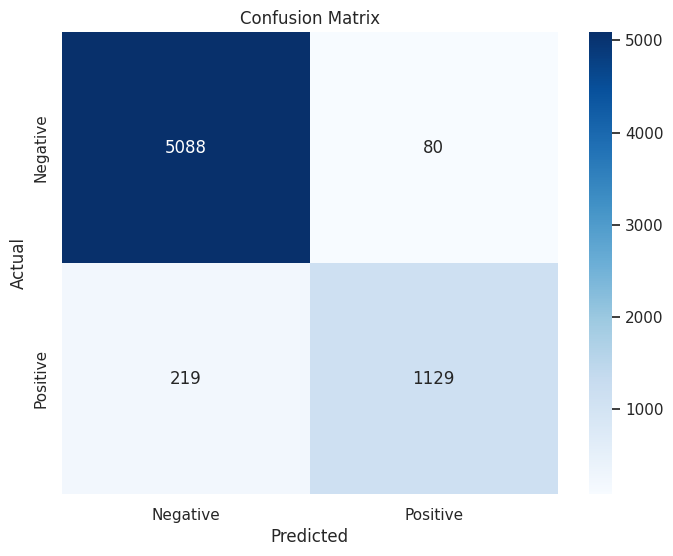

In [ ]:


#confusion matrix
cm = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

##Train the XGBoost model

In [ ]:

scale_pos_weight = len(y_train) / sum(y_train)
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train_resampled, y_train_resampled)


y_pred = xgb_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5168
           1       0.76      0.90      0.83      1348

    accuracy                           0.92      6516
   macro avg       0.87      0.91      0.89      6516
weighted avg       0.93      0.92      0.92      6516



In [ ]:
predictions_df = pd.DataFrame(y_pred, columns=['Predicted'])
actual_df = pd.DataFrame(y_test.values, columns=['Actual'])  # Convert actuals to DataFrame


results = pd.concat([predictions_df, actual_df], axis=1)


correlation = results.corr().loc['Predicted', 'Actual']
print(f'Correlation between predicted and actual values: {correlation}')

Correlation between predicted and actual values: 0.7791853305678812


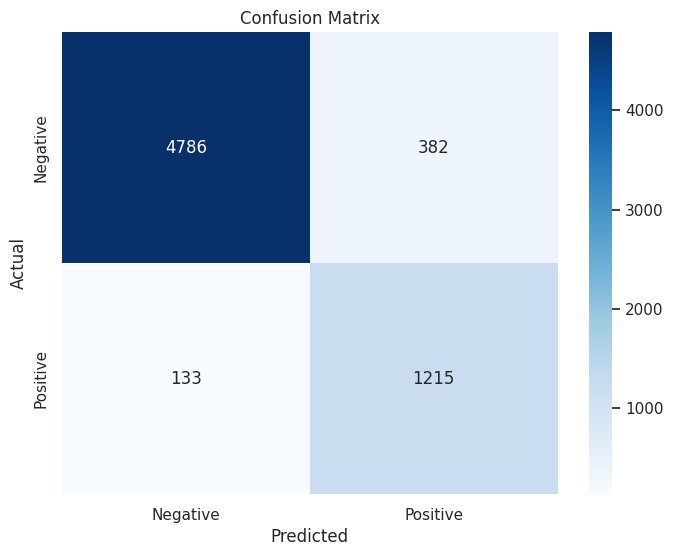

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

   !pip install xgboost
   !pip install huggingface_hub
   !pip install pandas scikit-learn

   import joblib
   joblib.dump(model, './model.pkl')
   joblib.dump(xgb_model, './xgb_model.pkl')


   from huggingface_hub import login, create_repo, HfApi
   import os


   !huggingface-cli login


   create_repo("Yabsra28/loan-approval-model", exist_ok=True)

   api = HfApi()

   api.upload_file(
       path_or_fileobj='./model.pkl',
       path_in_repo='model.pkl',
       repo_id="Yabsra28/loan-approval-model",
       commit_message="Add Random Forest model"
   )

   api.upload_file(
       path_or_fileobj='./xgb_model.pkl',
       path_in_repo='xgb_model.pkl',
       repo_id="Yabsra28/loan-approval-model",
       commit_message="Add XGBoost model"
   )

   notebook_path = '/content/drive/MyDrive/Colab Notebooks/Loan approval with larger dataset.ipynb'

   api.upload_file(
       path_or_fileobj=notebook_path,
       path_in_repo='Loan approval with larger dataset.ipynb',
       repo_id="Yabsra28/loan-approval-model",
       commit_message="Add loan approval prediction code"
   )